In [54]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA

In [71]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=1)

In [11]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [12]:
lfw.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], 
      dtype='<U17')

In [52]:
lfw.data.shape

(1140, 1850)

In [20]:
np.unique(lfw.target, return_counts=True)

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))

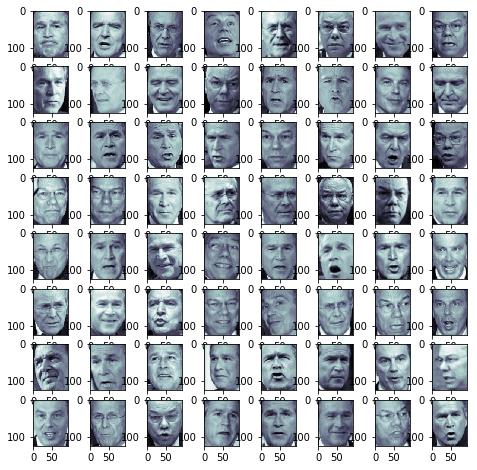

In [72]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [73]:
x = lfw.data
y = lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [34]:
time.time()

1531201541.3760278

In [45]:
from sklearn.svm import SVC

In [74]:
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
y_pred = rf.predict(x_test)
time_taken

0.5001521110534668

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 37   2  20   1   1]
 [  8   8  19   1   0]
 [ 14   1 101   3   3]
 [  3   3  17   7   1]
 [  1   2  21   1  10]]
             precision    recall  f1-score   support

          0       0.59      0.61      0.60        61
          1       0.50      0.22      0.31        36
          2       0.57      0.83      0.67       122
          3       0.54      0.23      0.32        31
          4       0.67      0.29      0.40        35

avg / total       0.57      0.57      0.54       285



In [76]:
pca = PCA(n_components = 150, whiten=True)
pca

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [77]:
pca.fit(x_train)
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)

In [78]:
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(x_train_reduced, y_train)
end_time = time.time()
time_taken = end_time - start_time
y_pca_pred = rf.predict(x_test_reduced)
time_taken

0.07622909545898438

In [79]:
print(confusion_matrix(y_test, y_pca_pred))
print(classification_report(y_test, y_pca_pred))

[[ 25   1  35   0   0]
 [  6   5  23   0   2]
 [  6   4 112   0   0]
 [  3   1  25   2   0]
 [  6   1  24   1   3]]
             precision    recall  f1-score   support

          0       0.54      0.41      0.47        61
          1       0.42      0.14      0.21        36
          2       0.51      0.92      0.66       122
          3       0.67      0.06      0.12        31
          4       0.60      0.09      0.15        35

avg / total       0.53      0.52      0.44       285

